In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("fivethirtyeight")

In [411]:
DATA_FOLDER = os.path.join(os.getcwd(), "data")
DATA_PATH = os.path.join(DATA_FOLDER, "Hourly_Traffic_on_Metropolitan_Transportation_Authority__MTA__Bridges_and_Tunnels__Beginning_2010.csv")

In [412]:
df = pd.read_csv(DATA_PATH, parse_dates=["Date"])

In [158]:
def wrangle_data(plazaID, data, direction="I"):
    df = data.copy()
    
    df1 = df[df["Plaza ID"].isin([plazaID])]
    df1 = df1[df1["Date"].dt.year.isin(["2019", "2020"])]
    
    filtering_days = ["03-04", "03-18", "03-19", "03-20", "03-31", "04-03"]
    days_names = ["March 4th", "March 18th", "March 19th", "March 20th", "March 31st", 
                  "April 3rd"]
    filter_2019_days = ["2019-"+i for i in filtering_days]
    filter_2020_days = ["2020-"+i for i in filtering_days]
    
    df1_19 = df1[df1["Date"].isin(filter_2019_days)]
    df1_20 = df1[df1["Date"].isin(filter_2020_days)]
    
    df1_19 = df1_19[df1_19["Direction"] == direction]
    df1_20 = df1_20[df1_20["Direction"] == direction]
    
    df1_19["Date name"] = df1_19["Date"].replace(dict(zip(df1_19["Date"].sort_values().unique(),
                                                     days_names)))
    df1_20["Date name"] = df1_20["Date"].replace(dict(zip(df1_20["Date"].sort_values().unique(),
                                                     days_names)))
    
    return df1_19, df1_20

In [150]:
df1_inbound_19_20 = wrangle_data(23, df, "I")

In [187]:
def inbound_outbound_graph1(x, y, data, hue, year, name, bound="Inbound"):
    plt.figure(figsize=(15, 6))
    sns.lineplot(x=x, y=y, 
             data=data, hue="Date name")
    plt.ylabel("Number of Vehicles")
    plt.title(str(year) + " - Daily Volume of " + bound + " Traffic on " + name)
    
    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

# Bronx-Whitestone Bridge (BWB) - 23

## Inbound

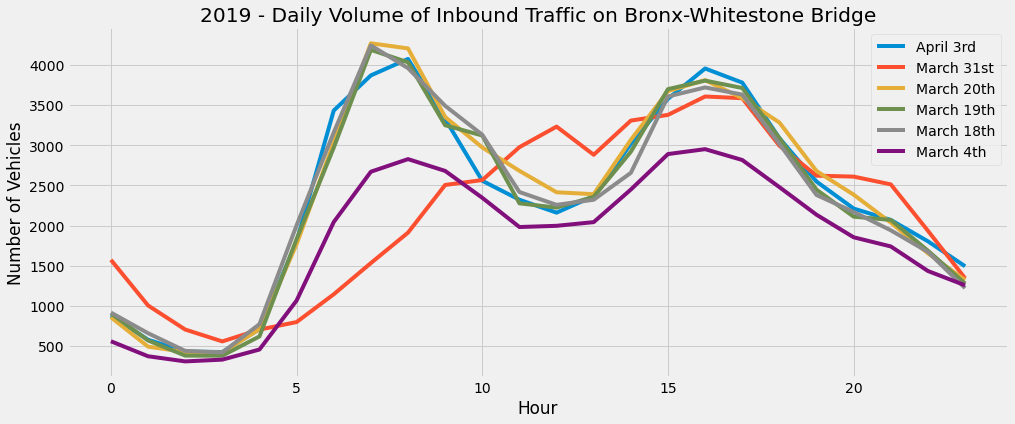

In [188]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df1_inbound_19_20[0], "Date name",
               2019, "Bronx-Whitestone Bridge")

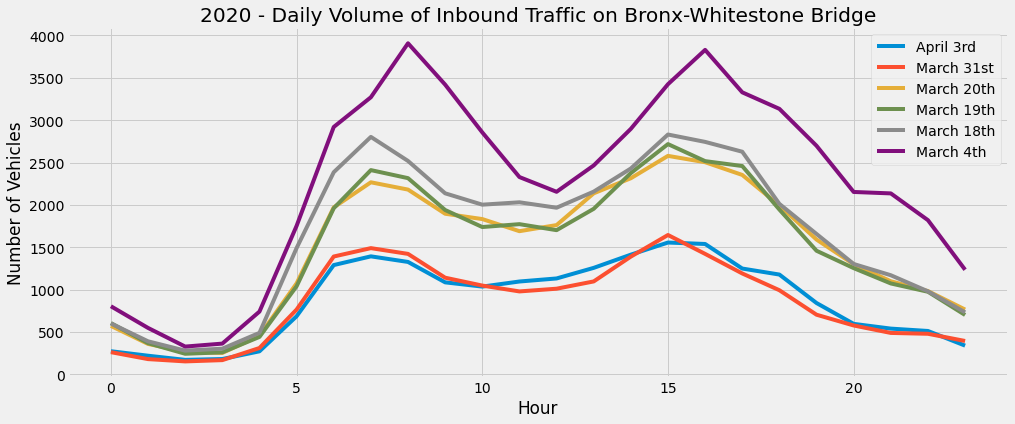

In [189]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df1_inbound_19_20[1], "Date name",
               2020, "Bronx-Whitestone Bridge")

## Outbound

In [177]:
df1_outbound_19_20 = wrangle_data(23, df, "O")

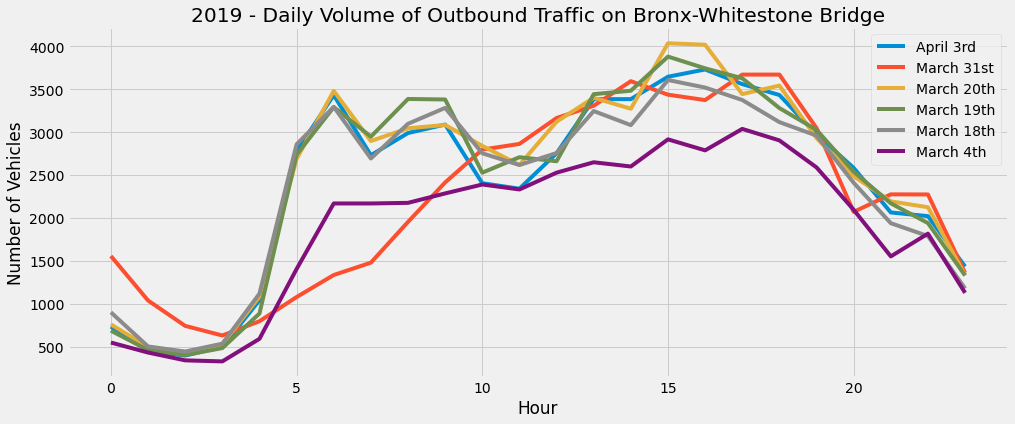

In [190]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df1_outbound_19_20[0], "Date name",
               2019, "Bronx-Whitestone Bridge", "Outbound")

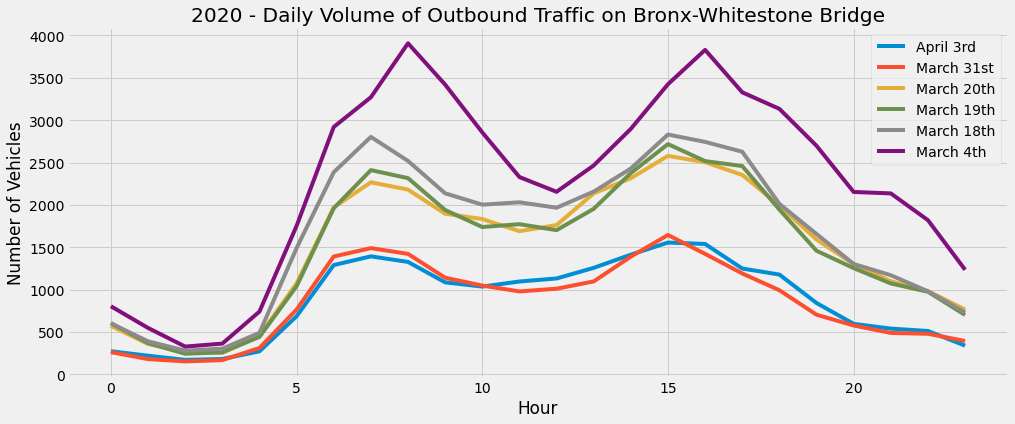

In [191]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df1_inbound_19_20[1], "Date name",
               2020, "Bronx-Whitestone Bridge", "Outbound")

# Queens Midtown Tunnel (QMT) - 27

## Inbound

In [186]:
df2_inbound_19_20 = wrangle_data(27, df, "I")

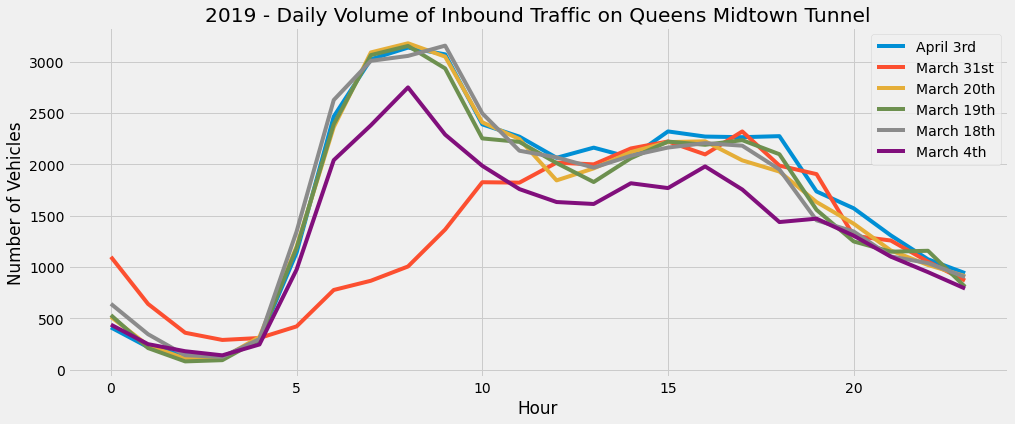

In [192]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df2_inbound_19_20[0], "Date name",
               2019, "Queens Midtown Tunnel", "Inbound")

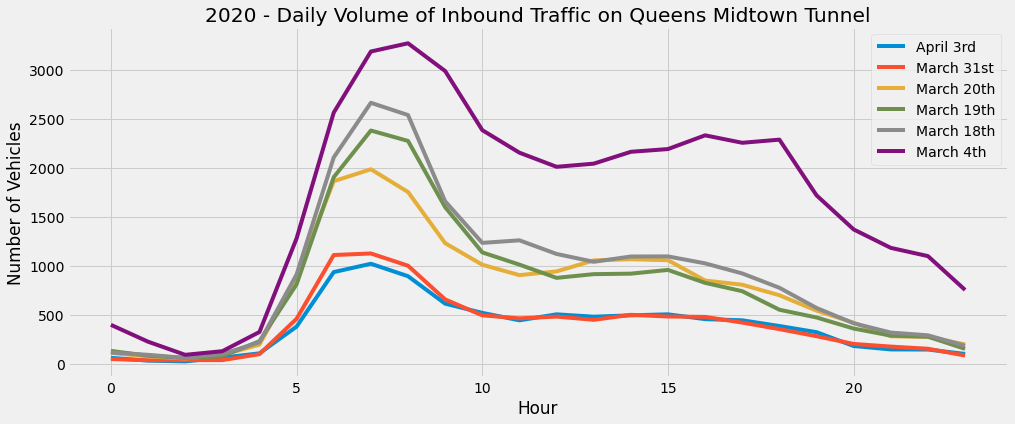

In [193]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df2_inbound_19_20[1], "Date name",
               2020, "Queens Midtown Tunnel", "Inbound")

## Outbound

In [194]:
df2_outbound_19_20 = wrangle_data(27, df, "O")

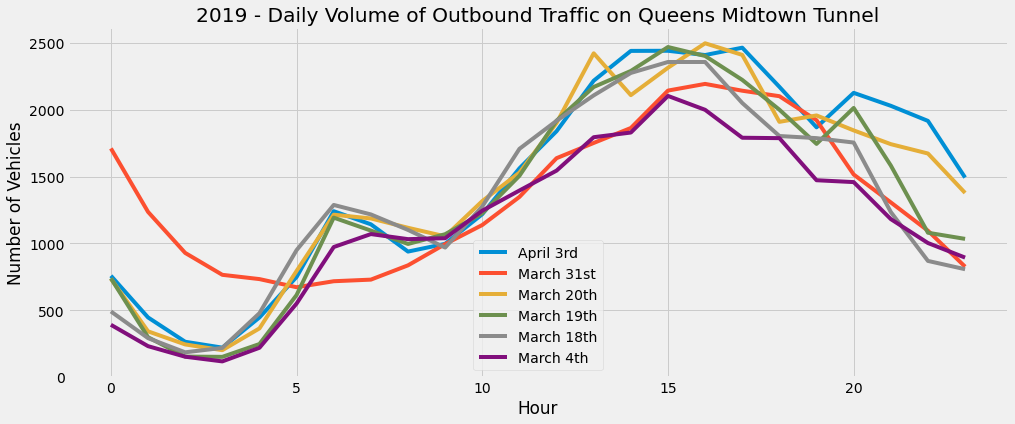

In [195]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df2_outbound_19_20[0], "Date name",
               2019, "Queens Midtown Tunnel", "Outbound")

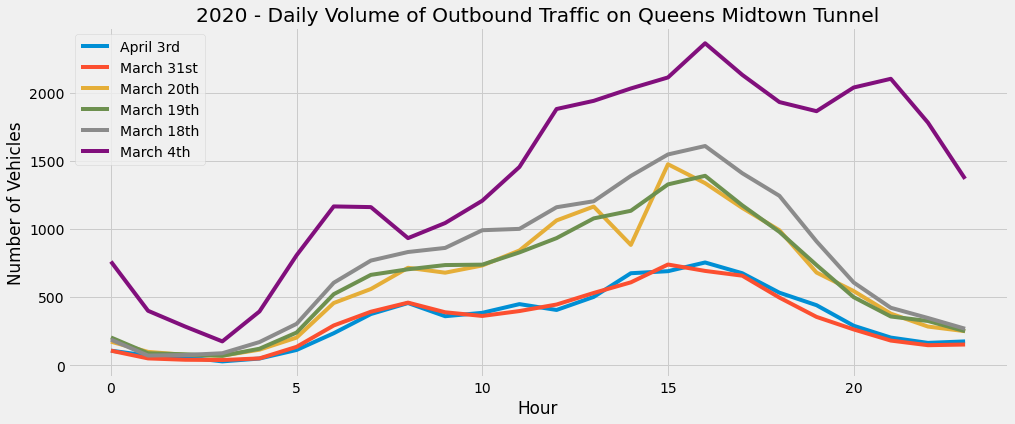

In [196]:
inbound_outbound_graph1("Hour", "# Vehicles - E-ZPass", df2_outbound_19_20[1], "Date name",
               2020, "Queens Midtown Tunnel", "Outbound")

# Slide 7 graph

In [233]:
def generate_weekly_average_2019_march(data, plaza, bound):
    df = data.copy()
    
    df1 = df[df["Plaza ID"] == plaza]
    df2 = df1[(df1["Date"].dt.year.isin(["2019"])) & (df1["Direction"] == bound)]
    return df2[df2["Date"].dt.month.isin([3])].groupby("Date")["# Vehicles - E-ZPass"].mean()

In [362]:
df1 = df[df["Plaza ID"] == 27]
df2 = df1[(df1["Date"].dt.year.isin(["2019"])) & (df1["Direction"] == "I")].copy()

df2["Week"] = df2["Date"].dt.dayofweek
df3_1 = df2[df2["Date"].dt.month.isin([3])].groupby(["Date", "Week"])["# Vehicles - E-ZPass"].sum().reset_index()
df3 = df3_1.groupby("Week").mean().reset_index()

# df2_1 = df2[df2["Date"].dt.month.isin([3])].groupby(["Date", "Week"])["# Vehicles - E-ZPass"].sum().reset_index()
# df3["Week"] = df3["Week"].replace(dict(zip(range(7), ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])))

In [356]:
df1_1 = df[df["Plaza ID"] == 27]
df2_1 = df1[(df1["Date"].dt.year.isin(["2020"])) & (df1["Direction"] == "I")].copy()

In [368]:
df2_1["Week"] = df2_1["Date"].dt.dayofweek

df4 = df2_1[df2_1["Date"].dt.month.isin([3])].groupby(["Date", "Week"])["# Vehicles - E-ZPass"].sum().reset_index()

In [372]:
df5 = pd.merge(left=df4, right=df3, on="Week", how="left")

df5 = df5.rename({"# Vehicles - E-ZPass_x":"March 2020 Vehicles",
            "# Vehicles - E-ZPass_y":"March 2019 average Vehicles"}, axis=1)

In [402]:
df5["Date"] = df5["Date"].dt.strftime('%Y-%m-%d')

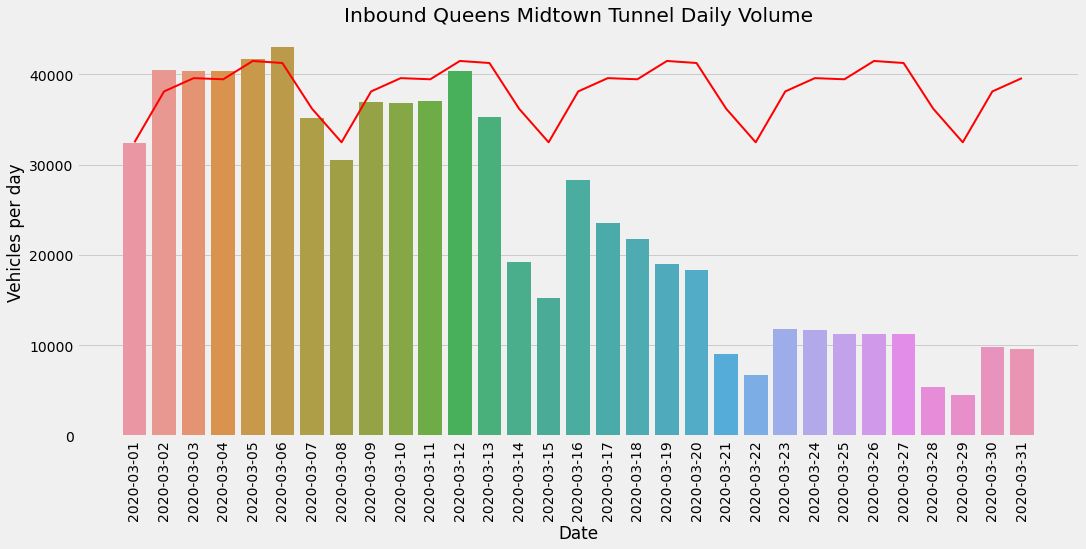

In [409]:
plt.figure(figsize=(16, 7))
sns.barplot(x="Date", y="March 2020 Vehicles", data=df5)
sns.lineplot(data=df5["March 2019 average Vehicles"].values, color="red", linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Vehicles per day")
plt.title("Inbound Queens Midtown Tunnel Daily Volume")
plt.show()